# PHYS3116 Computational Assessment: Area 51 Interns

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks

## Introduction to assessment
**Accreted Milky Way Globular Clusters**

Using data from the Harris Catalogue of Milky Way globular clusters and vandenBerg et al. (2013), use
stellar population (metallicities [Fe/H] and ages) and dynamical information to identify potentially
accreted globular clusters. Consider if there are some globular clusters that stand out in the agemetallicity relation or that do not rotate with the bulk of other globular clusters.

Consider what the above findings might mean for how the Milky Way formed and how many of its
globular clusters could be accreted and how many may have formed within the Milky Way. Consider
what further tests could be performed to delineate various possible formation scenarios.

Reformatted .csv versions of relevant data tables have been uploaded to Moodle for convenience.

## Introduction to this file
This file investigates potential accreted globular clusters through co-rotation the clusters


To get co-rotation we need to do the following steps:
1. Convert radial velocity into the galactic standard of rest so it is no longer relative to the sun or our solar system but to the galaxy
2. We obtain the average rotation formula for the average rotation patterns of each cluster through Galaxy LOS velocity
3. We apply this formula to each cluster for a projected velocity based on its coordinates
4. For each cluster, we compare projected and actual Galaxy LOS Velocity and we determine co-rotation through it

## 0) Merging CSV files

In [3]:
harris1 = pd.read_csv('HarrisPartI.csv')
harris3 = pd.read_csv('HarrisPartIII.csv')
merge = pd.merge(harris1, harris3, on='ID', how='outer')
merge.head()

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,...,v_LSR,sig_v,sig_v_e,c,r_c,r_h,mu_V,rho_0,lg_tc,lg_th
0,1636-283,ESO452-SC11,16:39:25.45,-28:23:55.3,351.91,12.10,8.3,2.1,8.0,-1.1,...,NaN,NaN,NaN,1.00,0.50,0.50,20.75,2.50,8.07,7.87
1,2MS-GC01,2MASS-GC01,18:08:21.81,-19:49:47,10.48,0.11,3.6,4.5,3.5,0.7,...,NaN,NaN,NaN,0.85,0.85,1.65,NaN,NaN,NaN,8.43
2,2MS-GC02,2MASS-GC02,18:09:36.50,-20:46:44,9.79,-0.61,4.9,3.2,4.9,0.8,...,-227.4,NaN,NaN,0.95,0.55,0.55,NaN,NaN,NaN,7.72
3,AM 1,E 1,03:55:02.3,-49:36:55,258.34,-48.47,123.3,124.6,-16.5,-80.1,...,101.3,NaN,NaN,1.36,0.17,0.41,23.62,0.03,8.96,9.61
4,AM 4,NaN,13:56:21.7,-27:10:03,320.28,33.51,32.2,27.8,20.7,-17.2,...,NaN,NaN,NaN,0.70,0.41,0.43,24.75,-0.05,8.42,8.32


## 1) Extracting data from .csv files


The data columns we need are:
- l and b for positions and projections
- $v_{lsr}$, as it is 'Radial velocity relative to Solar neighborhood LSR', so we dont need to take in account the sun's deviations in movement. So we use this instead of $v_r$
- Additionally we will remove data that has NA for $v_{LSR}$ as we are unable to use such data for our purposes

In [18]:
# We choose right columns that we care about
rotation_data = merge[['ID', 'L', 'B', 'v_LSR']]

# Get rid of rows we dont care about, because we lack the v_LSR for them
rotation_data = rotation_data.dropna(subset=['v_LSR'])
rotation_data.head()


,ID,L,B,v_LSR
2,2MS-GC02,9.79,-0.61,-227.4
3,AM 1,258.34,-48.47,101.3
5,Arp 2,8.55,-20.79,122.4
8,Djorg 1,356.69,-2.47,-355.0
12,Eridanus,218.10,-41.33,-39.1


## 2) Conversion to Galactic Standard of Rest

Now we convert $v_{LSR}$ in to $v_{GSR}$. This is done by the following formula:

$v_{GSR} = v_{LSR} + V_{LSR}sin(l)cos(b)$

We add the component 

where $V_{LSR}$ = 220 km/s (from https://www.sfu.ca/~boal/390lecs/390lec31.pdf), which is tangential component of Sun's motion with respect to the galactic center

Now we append this to the data:

In [ ]:
V_LSR = 220
rotation_data['v_GSR'] = rotation_data['v_LSR'] + V_LSR * np.sin(np.radians(rotation_data['L'])) * np.cos(np.radians(rotation_data['B']))
rotation_data.head()

## 2) Displaying Relevant Data Types

Accreted Globular Clusters: Cluster that came from outside the Milky Way instead of made inside

Aspects that help us know if a cluster is one:
- Rotates with the same direction of the milky way, Prograde orbit
  - Hard for milky way to make retrograde, but still possible  
- Metallicity age relation generally follows a set track
  - Acrete has less metallicity for its age due to less enrichment due to less generations of stars
- Acreted are more further away from galaxy center as non-acreted are more likely to be in the center


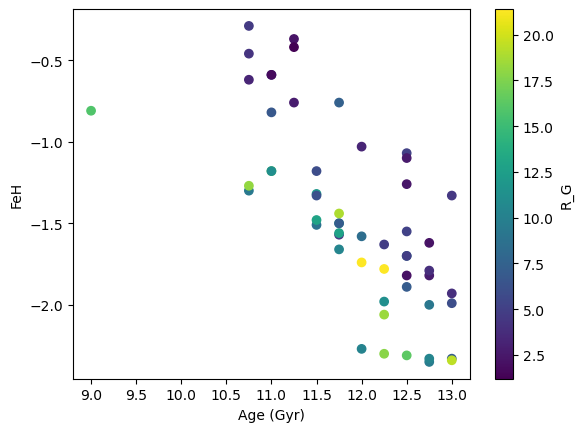

In [ ]:
plt.scatter(
    vandenberg["Age"],
    vandenberg["FeH"],
    c=[vandenberg["R_G"]],
)

# Change y-limit to be between 0 and 1.5
plt.xlabel('Age (Gyr)')
plt.ylabel('FeH')
cbar = plt.colorbar()
cbar.set_label('R_G')

We can get a linear regression of the line, we also have a clear outlier and we get its equation:

In [ ]:
# Fit a linear curve
result = stats.linregress(vandenberg["Age"], vandenberg["FeH"])
print(result)
print(f'Line has equation y = ({result.slope:.2f} +- {result.stderr:.2f}) * x + ({result.intercept:.2f} +- {result.intercept_stderr:.2f})')
print(f'Result has R-value of {result.rvalue:.2f} and p-value of {result.pvalue:.2e}')

LinregressResult(slope=-0.49787772312016854, intercept=4.468926723311824, rvalue=-0.7179325112384898, pvalue=6.863504294489428e-10, stderr=0.06631025602163103, intercept_stderr=0.7908921228707789)
Line has equation y = (-0.50 +- 0.07) * x + (4.47 +- 0.79)
Result has R-value of -0.72 and p-value of 6.86e-10


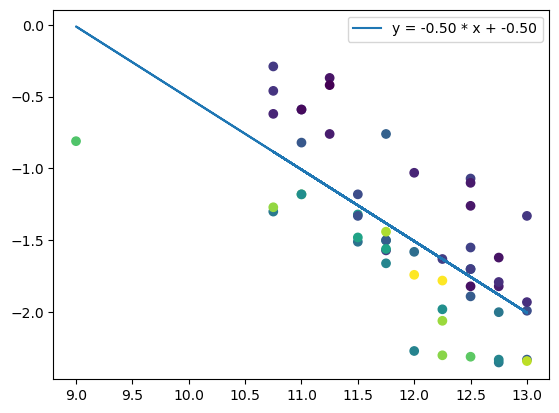

In [ ]:
plt.scatter(
    vandenberg["Age"],
    vandenberg["FeH"],
    c=[vandenberg["R_G"]],
)

# Adding LOB to graph
plt.plot(
    vandenberg["Age"], result.slope * vandenberg["Age"] + result.intercept,
    label=f'y = {result.slope:.2f} * x + {result.slope:.2f}'
)
plt.legend()